<a href="https://colab.research.google.com/github/amityadav23112000/AIML/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]

✅ Model Performance:
Mean Squared Error (MSE): 0.5305677824766752
Root Mean Squared Error (RMSE): 0.7284008391515452
R² Score: 0.5957702326061664


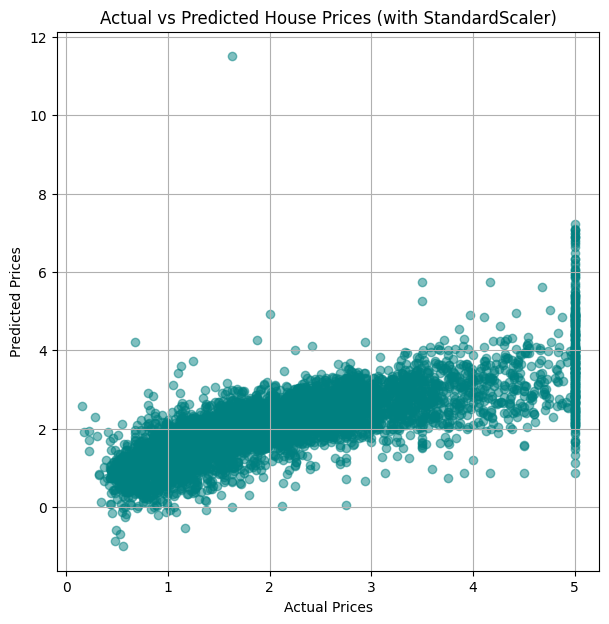

In [47]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


# print(housing.feature_names)
# print(housing.data.shape)
# print(type(housing))
# print(dataset.head())
# print(dataset.tail)
# print(dataset.describe())
# print(dataset.info())
# print(dataset.isnull().sum())
dataset = pd.DataFrame(housing.data, columns= housing.feature_names)
dataset["Prices"] = housing.target
# dataset.corr()
# sns.pairplot(dataset)
# fig,ax = plt.subplots(figsize=(10,10))
# sns.boxplot(data=dataset , ax=ax)
# plt.savefig("boxplot.png")

x = dataset.iloc[:, :-1]   # all rows, all columns except last
y = dataset.iloc[:, -1]    # all rows, only last column
# print(y)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

# print("Training data shape:", X_train.shape)
# print("Testing data shape:", X_test.shape)

# Step 3: Scale the feature data using StandardScaler
scaler = StandardScaler()

# Fit only on training data, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Predict using the trained model
y_pred = model.predict(X_test_scaled)
print(y_pred)

# Step 6: Save the model and scaler using pickle
with open("linear_regression_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Model Performance:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", mse ** 0.5)
print("R² Score:", r2)

# Step 7: Visualization — Actual vs Predicted Prices
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (with StandardScaler)")
plt.grid(True)
plt.show()
